<a href="https://colab.research.google.com/github/AbrahamMulat/TensorFlow-deep-learning-Exercise-and-Project/blob/main/03_Computer_vision_and_convolutional_neural_networks_in_TensorFlow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠 03. Computer vision & convolutional neural networks in TensorFlow Exercises
1. Spend 20-minutes reading and interacting with the [CNN explainer website](https://poloclub.github.io/cnn-explainer/).
* What are the key terms? e.g. explain convolution in your own words, pooling in your own words
2. Play around with the "understanding hyperparameters" section in the [CNN explainer](https://poloclub.github.io/cnn-explainer/) website for 10-minutes.
* What is the kernel size?
* What is the stride?
* How could you adjust each of these in TensorFlow code?
3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.
4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

## <center>**Convolutional Neural Network (CNN)**</center>
A Convolutional neural network is a type of deep neural network which uses a convolution operation to find patterns in data. The convolution operation performs a mathematical operation between matrixes.
A CNN is mostly used for visual recognation such as image classification, object detection, etc. A typical CNN has the following layers:

* **Input layer** - The input layer represents the the input image to the CNN. It contains three channels correspong to red, green and blue channels of the image.

* **Convolution layer** - The convolution layer use a convolution operation to extract important features from the image. The convolution operation performs a dot product between two matrices(receptive field of input images and filter or kernel map).
<img src="https://poloclub.github.io/cnn-explainer/assets/figures/convlayer_detailedview_demo.gif">
    *Convolution operation image from [CNN Explainer](https://poloclub.github.io/cnn-explainer/)*

* **Pooling layer** - the pooling layer is used to reduce the spatial dimension of the network, which reduces the parameters and overall computation of the network. There are various types of pooling such as max-pooling and average pooling.

* **Flatten layer**- flattening is converting a three-dimensional layer in the network into a one-dimensional vector to fit a fully-connected layer for classification.  

* **Fully connected layer** - Fully connected layers use the feature information to attain a final class label. Nodes of fully 
connected layers are connected to each output of the previous layer, and their outputs are connected to each node of the next layer. In the final layer, there are n number of nodes, where n equals the number of classes.

### <center> **Hyperparameters of Convolutional Neural Network** </center>

1. **padding** - a technique used to avoid loss of information around the edge or border of the image. zero padding is the most commonly used approach. It addes zero around the edge of the input.
2. **stride** - is the number of steps the kenel moves over the input image.
3. **kernel size** - also referred to as filter size, refers to the dimensions of the sliding window over the input image. Smalll kernel sizes are able to extract much larger amount of information containing highly local features from the input.
4. **Activation function** - activation functions are typically used to transform an input to an out put. CNNs use non-linear activation function which is the for achieving high accuracies for different tasks.

## 3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.

For this experimnet, I took 10 images of cats and 10 images of dogs from the cats and dogs image data set.
The goal is to train a CNN classifier to clasify the images of cats and dogs.
The data contains train and test directory. The training dataset contains 10 images for each class(20 images in total) and the test dataset contains 4 images per class(8 images in total).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
### Get data and unzip data

import zipfile

# unzip data
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/cats_and_dogs_10.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
import os

# walk through cats_and_dogs_10 directory and list numbers of files.
for dirpath, dirnames, filenames in os.walk("/content/cats_and_dogs_10"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 3 directories and 0 images in '/content/cats_and_dogs_10'
There are 2 directories and 0 images in '/content/cats_and_dogs_10/validation'
There are 0 directories and 4 images in '/content/cats_and_dogs_10/validation/cat'
There are 0 directories and 4 images in '/content/cats_and_dogs_10/validation/dog'
There are 0 directories and 10 images in '/content/cats_and_dogs_10/test'
There are 2 directories and 0 images in '/content/cats_and_dogs_10/train'
There are 0 directories and 10 images in '/content/cats_and_dogs_10/train/cat'
There are 0 directories and 10 images in '/content/cats_and_dogs_10/train/dog'


In [13]:
# Visualize random images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  print(f"Image shape: {img.shape}")
  plt.title(target_class)
  plt.axis("off")

Image shape: (499, 495, 3)


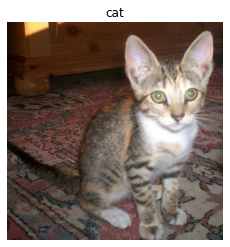

In [14]:
# Visualize a random images of cat from the training dataset
cat_img = view_random_image(target_dir="cats_and_dogs_10/train/", target_class="cat")

Image shape: (375, 499, 3)


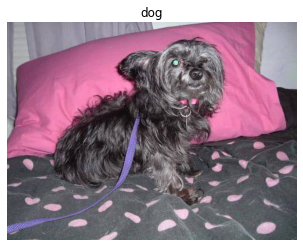

In [15]:
# Visualize a random images of dogs from the training dataset
dog_img = view_random_image(target_dir="cats_and_dogs_10/train/", target_class="dog")

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set seed
tf.random.set_seed(42)

# Preprocess the data (normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "cats_and_dogs_10/train/"
test_dir = "cats_and_dogs_10/validation/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 20 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [53]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=3,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(filters=3, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # sigmoid for binary classification.
])

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(train_data,
                    epochs=50,
                    validation_data=valid_data)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.6966 - accuracy: 0.4000 - val_loss: 0.7028 - val_accuracy: 0.3750
Epoch 2/50
1/1 [==============================] - 0s 146ms/step - loss: 0.6785 - accuracy: 0.7500 - val_loss: 0.7070 - val_accuracy: 0.3750
Epoch 3/50
1/1 [==============================] - 0s 131ms/step - loss: 0.6614 - accuracy: 0.8500 - val_loss: 0.7110 - val_accuracy: 0.3750
Epoch 4/50
1/1 [==============================] - 0s 131ms/step - loss: 0.6437 - accuracy: 0.9500 - val_loss: 0.7145 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 132ms/step - loss: 0.6256 - accuracy: 1.0000 - val_loss: 0.7174 - val_accuracy: 0.3750
Epoch 6/50
1/1 [==============================] - 0s 135ms/step - loss: 0.6074 - accuracy: 1.0000 - val_loss: 0.7201 - val_accuracy: 0.3750
Epoch 7/50
1/1 [==============================] - 0s 131ms/step - loss: 0.5893 - accuracy: 1.0000 - val_loss: 0.7233 - val_accuracy: 0.3750
Epoch 8/50
1/1 [=======

## 4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

In [54]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

In [56]:
# Create a model
model_lr = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=3,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(filters=3, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # sigmoid for binary classification.
])

# Compile the model
model_lr.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_lr = model_lr.fit(train_data,
                    epochs=50,
                    validation_data=valid_data,
                    callbacks=[lr_scheduler])

Epoch 1/50
1/1 [==============================] - 1s 647ms/step - loss: 0.6989 - accuracy: 0.5000 - val_loss: 0.7150 - val_accuracy: 0.3750 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - 0s 131ms/step - loss: 0.6959 - accuracy: 0.5000 - val_loss: 0.7134 - val_accuracy: 0.3750 - lr: 1.1220e-04
Epoch 3/50
1/1 [==============================] - 0s 145ms/step - loss: 0.6926 - accuracy: 0.5000 - val_loss: 0.7120 - val_accuracy: 0.3750 - lr: 1.2589e-04
Epoch 4/50
1/1 [==============================] - 0s 130ms/step - loss: 0.6890 - accuracy: 0.5000 - val_loss: 0.7106 - val_accuracy: 0.3750 - lr: 1.4125e-04
Epoch 5/50
1/1 [==============================] - 0s 131ms/step - loss: 0.6851 - accuracy: 0.6000 - val_loss: 0.7093 - val_accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/50
1/1 [==============================] - 0s 130ms/step - loss: 0.6809 - accuracy: 0.7500 - val_loss: 0.7082 - val_accuracy: 0.3750 - lr: 1.7783e-04
Epoch 7/50
1/1 [==============================] - 0s 131ms

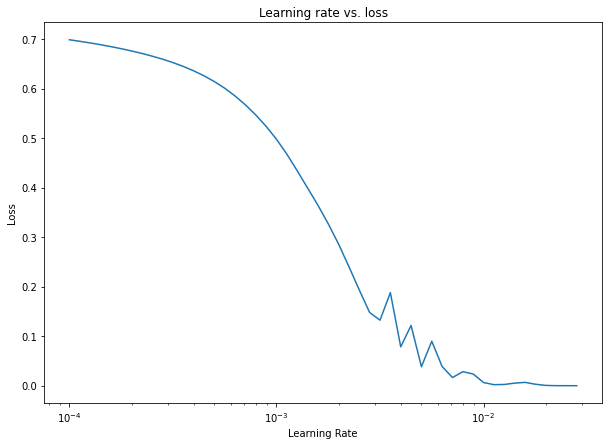

In [57]:
# Plot the learning rate versus the loss (to figure out where is the inflection point)
import numpy as np
lrs = 1e-4 * (10 ** (np.arange(50)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_lr.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [58]:
# Ideal learning rate is 10-2
lr = 10**-2
lr

0.01

In [61]:
# Compile model_lr again with the new learning rate
model_lr.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                 metrics=["accuracy"])

# Fit the model
history_lr1 = model_lr.fit(train_data,
                           epochs=50,
                           validation_data=valid_data)

Epoch 1/50
1/1 [==============================] - 1s 650ms/step - loss: 4.3746e-05 - accuracy: 1.0000 - val_loss: 3.8357 - val_accuracy: 0.3750
Epoch 2/50
1/1 [==============================] - 0s 130ms/step - loss: 1.2285e-07 - accuracy: 1.0000 - val_loss: 6.3554 - val_accuracy: 0.3750
Epoch 3/50
1/1 [==============================] - 0s 132ms/step - loss: 5.2216e-09 - accuracy: 1.0000 - val_loss: 9.0326 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 127ms/step - loss: 2.1693e-09 - accuracy: 1.0000 - val_loss: 11.8863 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 128ms/step - loss: 9.3572e-09 - accuracy: 1.0000 - val_loss: 14.8311 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 129ms/step - loss: 3.7632e-07 - accuracy: 1.0000 - val_loss: 17.5399 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 130ms/step - loss: 3.8752e-05 - accuracy: 1.0000 - val_loss: 9.7499 - val_accura